In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading RPPA and CRIPSR data from Local Directory

In [183]:
df_rppa=pd.read_csv("RPPA.csv")
df_crispr=pd.read_csv("CRISPR.csv")

In [184]:
df_rppa=df_rppa.rename(columns={'Unnamed: 0':'cell line'})
df_rppa.head()

,cell line,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1.1,EIF4EBP1.2,EIF4EBP1.3,TP53BP1,ARAF,...,TSC2.1,VAV1,KDR,VHL,XBP1,XRCC1,YAP1,YAP1.1,YBX1,YBX1.1
0,DMS53_LUNG,-0.104888,0.060414,0.309068,-0.075506,0.230359,0.198304,-0.030541,0.455889,0.090484,...,-0.099433,-0.486715,-1.147858,0.133876,-0.075812,-0.144388,-1.090303,-2.109324,0.178104,0.246541
1,SW1116_LARGE_INTESTINE,0.358504,-0.180291,-0.041237,-0.286629,-0.877406,-1.026948,-0.462761,-0.011197,0.605330,...,-0.109777,0.349330,0.770148,0.984297,-0.168138,-0.004905,0.189294,-0.283593,0.255972,-0.121134
2,NCIH1694_LUNG,0.028738,0.071902,-0.094847,0.285069,1.321551,0.620703,-0.439484,0.195007,0.036221,...,0.154344,-0.478189,-1.185530,1.273013,-0.240413,0.476633,-1.367465,-2.525695,-0.137880,-0.451282
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.120039,-0.066802,-0.128007,-0.552081,-0.292428,-1.415935,-0.138858,-0.066122,-0.346564,...,0.040106,5.923830,-3.893832,-2.499188,0.632758,0.025639,-1.189180,-3.056863,0.025997,-0.465205
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.268997,-0.060281,-0.137881,-0.398729,-0.095622,-0.533905,0.054245,-0.573022,-0.162968,...,-0.466919,5.475880,-0.561973,-0.500953,-0.261494,0.358679,-0.951686,-3.247388,-0.151424,-0.145426


In [185]:
df_crispr.head()

,line,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,...,UHRF1BP1L,UHRF2,UIMC1,ULBP1,ULBP2,ULBP3,ULK1,ULK2,ULK3,ULK4
0,ACH-000004,0.002472,0.006113,0.080820,0.014331,0.011727,0.086325,0.000195,0.385731,0.000323,...,0.000226,0.482277,0.088692,0.105547,0.251080,0.012645,0.125621,0.001633,0.026469,0.000128
1,ACH-000005,0.106867,0.002193,0.013620,0.003971,0.057068,0.181176,0.006674,0.226020,0.022460,...,0.129011,0.173723,0.111182,0.248581,0.002710,0.030146,0.030472,0.000230,0.022362,0.000945
2,ACH-000007,0.008004,0.005757,0.022515,0.002067,0.004548,0.002647,0.006611,0.350966,0.015407,...,0.007540,0.009939,0.298588,0.004260,0.053709,0.064741,0.005785,0.053324,0.015700,0.000100
3,ACH-000009,0.005477,0.013870,0.010608,0.006887,0.007972,0.012466,0.007143,0.654158,0.002847,...,0.011120,0.043010,0.114406,0.003146,0.085866,0.065066,0.040335,0.101210,0.014466,0.000668
4,ACH-000011,0.001426,0.006870,0.020701,0.000096,0.031714,0.157628,0.008184,0.325639,0.005510,...,0.002486,0.190601,0.212744,0.004571,0.027059,0.261925,0.305681,0.104093,0.022448,0.001405


In [186]:
crispr_genes=df_crispr.columns
rppa_proteans=df_rppa.columns

### Similar Gene's between RPPA and CRISPR

In [187]:
similar_gene=[]
for i in crispr_genes:
    for j in rppa_proteans:
        if i==j:
            similar_gene.append(i)

### Visualize First 20 similar gene's

In [188]:
similar_gene[:20]

['ACACA',
 'ACTB',
 'ACVRL1',
 'ADAR',
 'AKT1S1',
 'ANXA1',
 'ANXA7',
 'ASNS',
 'ATM',
 'BAD',
 'BAK1',
 'BAP1',
 'BAX',
 'BCL2',
 'BCL2L1',
 'BCL2L11',
 'BECN1',
 'BID',
 'BIRC2',
 'BRAF']

### Replace one random gene of RPPA with same CRISPR gene

In [189]:
df_rppa['BAP1']=df_crispr['BAP1']
df_rppa.head()

,cell line,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1.1,EIF4EBP1.2,EIF4EBP1.3,TP53BP1,ARAF,...,TSC2.1,VAV1,KDR,VHL,XBP1,XRCC1,YAP1,YAP1.1,YBX1,YBX1.1
0,DMS53_LUNG,-0.104888,0.060414,0.309068,-0.075506,0.230359,0.198304,-0.030541,0.455889,0.090484,...,-0.099433,-0.486715,-1.147858,0.133876,-0.075812,-0.144388,-1.090303,-2.109324,0.178104,0.246541
1,SW1116_LARGE_INTESTINE,0.358504,-0.180291,-0.041237,-0.286629,-0.877406,-1.026948,-0.462761,-0.011197,0.605330,...,-0.109777,0.349330,0.770148,0.984297,-0.168138,-0.004905,0.189294,-0.283593,0.255972,-0.121134
2,NCIH1694_LUNG,0.028738,0.071902,-0.094847,0.285069,1.321551,0.620703,-0.439484,0.195007,0.036221,...,0.154344,-0.478189,-1.185530,1.273013,-0.240413,0.476633,-1.367465,-2.525695,-0.137880,-0.451282
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.120039,-0.066802,-0.128007,-0.552081,-0.292428,-1.415935,-0.138858,-0.066122,-0.346564,...,0.040106,5.923830,-3.893832,-2.499188,0.632758,0.025639,-1.189180,-3.056863,0.025997,-0.465205
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.268997,-0.060281,-0.137881,-0.398729,-0.095622,-0.533905,0.054245,-0.573022,-0.162968,...,-0.466919,5.475880,-0.561973,-0.500953,-0.261494,0.358679,-0.951686,-3.247388,-0.151424,-0.145426


In [190]:
df_rppa['BAP1']

0      0.679312
1      0.532996
2      0.895648
3      0.581286
4      0.899652
         ...   
894         NaN
895         NaN
896         NaN
897         NaN
898         NaN
Name: BAP1, Length: 899, dtype: float64

### Selecting First 312 Cell lines

In [191]:
df_rppa=df_rppa.iloc[0:312,]
df_rppa.head()

,cell line,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1.1,EIF4EBP1.2,EIF4EBP1.3,TP53BP1,ARAF,...,TSC2.1,VAV1,KDR,VHL,XBP1,XRCC1,YAP1,YAP1.1,YBX1,YBX1.1
0,DMS53_LUNG,-0.104888,0.060414,0.309068,-0.075506,0.230359,0.198304,-0.030541,0.455889,0.090484,...,-0.099433,-0.486715,-1.147858,0.133876,-0.075812,-0.144388,-1.090303,-2.109324,0.178104,0.246541
1,SW1116_LARGE_INTESTINE,0.358504,-0.180291,-0.041237,-0.286629,-0.877406,-1.026948,-0.462761,-0.011197,0.605330,...,-0.109777,0.349330,0.770148,0.984297,-0.168138,-0.004905,0.189294,-0.283593,0.255972,-0.121134
2,NCIH1694_LUNG,0.028738,0.071902,-0.094847,0.285069,1.321551,0.620703,-0.439484,0.195007,0.036221,...,0.154344,-0.478189,-1.185530,1.273013,-0.240413,0.476633,-1.367465,-2.525695,-0.137880,-0.451282
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,0.120039,-0.066802,-0.128007,-0.552081,-0.292428,-1.415935,-0.138858,-0.066122,-0.346564,...,0.040106,5.923830,-3.893832,-2.499188,0.632758,0.025639,-1.189180,-3.056863,0.025997,-0.465205
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,-0.268997,-0.060281,-0.137881,-0.398729,-0.095622,-0.533905,0.054245,-0.573022,-0.162968,...,-0.466919,5.475880,-0.561973,-0.500953,-0.261494,0.358679,-0.951686,-3.247388,-0.151424,-0.145426


In [192]:
df_rppa.shape

(312, 215)

In [193]:
y=df_rppa['BAP1']
y

0      0.679312
1      0.532996
2      0.895648
3      0.581286
4      0.899652
         ...   
307    0.779488
308    0.760357
309    0.342126
310    0.813242
311    0.538534
Name: BAP1, Length: 312, dtype: float64

In [194]:
X=df_rppa
if(all(x in X.columns for x in ['cell line','BAP1'])):
    X.drop(['cell line','BAP1'], axis=1, inplace=True)
    X.shape
else:    
    print("The columns already been dropped")

In [195]:
X.shape

(312, 213)

# Missing value Testing

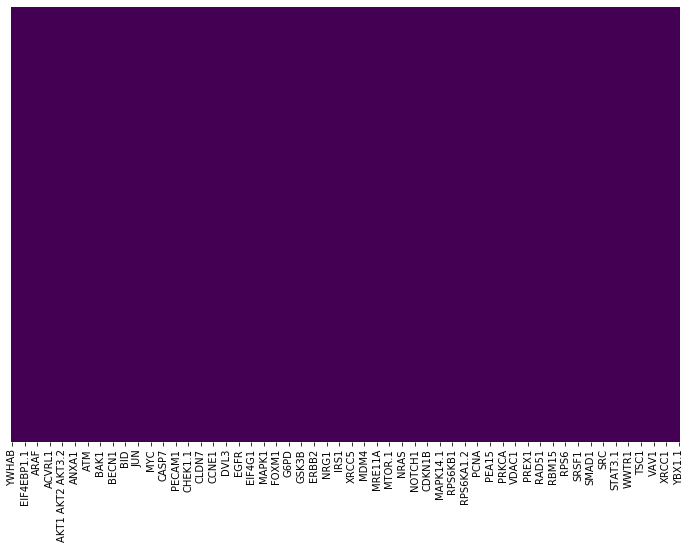

In [196]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax)

##  Pearson's Correlation

In [197]:
df_rppa.corr(method ='pearson')

,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1.1,EIF4EBP1.2,EIF4EBP1.3,TP53BP1,ARAF,ACACA ACACB,...,TSC2.1,VAV1,KDR,VHL,XBP1,XRCC1,YAP1,YAP1.1,YBX1,YBX1.1
YWHAB,1.000000,0.184760,0.062942,-0.038025,-0.235699,-0.162653,-0.059775,0.025192,0.093052,-0.105325,...,-0.097691,0.003080,0.124077,0.026600,0.055833,0.165709,0.055881,0.033246,0.001973,-0.042021
YWHAE,0.184760,1.000000,-0.092837,0.095919,-0.040453,-0.035766,0.015580,-0.006287,0.018315,0.086816,...,0.108756,-0.016038,-0.289961,-0.060842,0.090676,0.065027,-0.122696,-0.136458,0.009716,-0.076577
YWHAZ,0.062942,-0.092837,1.000000,0.235959,0.057337,0.042857,0.004492,-0.126266,-0.053592,0.116205,...,-0.128043,-0.039052,0.086901,0.091638,-0.151605,-0.086669,0.070309,0.138910,0.036168,-0.058817
EIF4EBP1,-0.038025,0.095919,0.235959,1.000000,0.512738,0.641303,0.654235,-0.035186,-0.130526,0.254380,...,-0.019024,0.155519,-0.251832,-0.180495,0.123851,-0.003447,-0.081978,-0.030034,-0.058127,-0.129827
EIF4EBP1.1,-0.235699,-0.040453,0.057337,0.512738,1.000000,0.804791,0.593094,0.077129,-0.245504,0.150722,...,0.119318,-0.030359,-0.173897,-0.206734,-0.095787,-0.078418,-0.023570,0.014161,0.061923,0.093405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XRCC1,0.165709,0.065027,-0.086669,-0.003447,-0.078418,-0.088817,-0.080704,0.217139,-0.128332,0.031221,...,0.098089,0.150341,-0.150174,0.084284,-0.051941,1.000000,-0.233566,-0.266940,-0.187708,-0.251606
YAP1,0.055881,-0.122696,0.070309,-0.081978,-0.023570,-0.005664,0.093013,-0.074899,0.225283,-0.197564,...,-0.171889,-0.517007,0.557796,0.114430,-0.255489,-0.233566,1.000000,0.905625,0.173634,0.275789
YAP1.1,0.033246,-0.136458,0.138910,-0.030034,0.014161,0.017129,0.085906,-0.102891,0.174132,-0.091998,...,-0.105044,-0.563752,0.537659,0.128215,-0.199105,-0.266940,0.905625,1.000000,0.177155,0.332847
YBX1,0.001973,0.009716,0.036168,-0.058127,0.061923,-0.015068,0.068283,0.040439,-0.034465,-0.165911,...,-0.161485,-0.163267,0.160015,0.010803,-0.030804,-0.187708,0.173634,0.177155,1.000000,0.137692


# Spiliting the dataset

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [199]:
X_train.head()

,YWHAB,YWHAE,YWHAZ,EIF4EBP1,EIF4EBP1.1,EIF4EBP1.2,EIF4EBP1.3,TP53BP1,ARAF,ACACA ACACB,...,TSC2.1,VAV1,KDR,VHL,XBP1,XRCC1,YAP1,YAP1.1,YBX1,YBX1.1
223,0.048295,-0.061054,1.127499,0.984788,0.347043,0.931910,0.031756,-0.202688,-0.315765,0.075885,...,-0.113244,2.578599,1.641851,0.980620,-0.172706,-0.063418,1.168368,2.310139,0.452978,0.196533
270,-0.149744,-0.267633,0.186003,0.129857,0.161249,0.023242,0.279236,1.087560,-0.254653,-0.406984,...,-0.405791,2.457445,0.889177,5.628637,0.136605,0.177443,-0.149938,0.185865,0.057650,0.123929
37,0.348674,0.054504,0.000000,1.161253,0.402340,0.645663,0.473726,0.097145,-0.559749,-0.119903,...,0.055480,-0.660905,1.433933,-2.374292,0.394413,-0.028957,0.281093,1.254182,0.542673,-0.072347
164,-0.077114,-0.235431,-0.433337,-0.279147,-0.413183,-0.388910,-0.330599,-0.384617,0.505938,0.443324,...,-0.221331,-0.258632,0.322988,1.726302,0.336642,0.079060,0.323916,0.425297,0.031182,0.094774
181,0.159045,0.106350,0.154540,-0.643659,-0.083945,-0.392042,-0.334991,0.054858,-0.445941,-0.189879,...,0.166958,1.760661,1.308650,-0.800911,-0.318585,0.212093,0.310132,1.174791,0.062217,0.260223


# Base line Prediction

In [200]:
y_pred=X_test.mean(axis = 1).values

In [201]:
y_pred[:10]

array([ 0.00669811,  0.00534207,  0.13470292,  0.04373664,  0.10226338,
        0.12108254,  0.07291005,  0.00150516, -0.02955877,  0.03582033])

### Root Mean Square Error (RMSE) for Basline Model

In [202]:
from sklearn.metrics import mean_squared_error
mse_baseline=mean_squared_error(y_test, y_pred)
rmse_baseline= np.sqrt(mse_baseline)
rmse_baseline

0.6007744331684657

#  1) Linear Regression

In [203]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [204]:
model = LinearRegression()
model = LinearRegression().fit(X_train, y_train)

In [205]:
y_pred = model.predict(X_test)

In [206]:
y_pred[:10]

array([ 1.20780886,  1.3343217 ,  2.15384153,  0.09532131,  2.14821929,
        1.41943713,  1.08973393, -0.33325107,  1.50553861,  0.09839838])

### R-Squared for LR

In [207]:
r_sq = model.score(X_train, y_train)
print('Coefficient of Determination:', r_sq)

Coefficient of Determination: 0.9834537933791936


### RMSE for LR

In [208]:
mse_linear_regression=mean_squared_error(y_test, y_pred)
rmse_linear_regression= np.sqrt(mse_linear_regression)
rmse_linear_regression

1.6104947748870142

# 2) Random Forrest (RF)

In [209]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

In [210]:
Model = RandomForestRegressor(n_estimators = 30, 
                              random_state = 2017, 
                              oob_score = True, 
                              max_features = 23,
                              min_samples_leaf = 8)
Model.fit(X = X_test, y = y_test)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=23, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=True,
                      random_state=2017, verbose=0, warm_start=False)

### R-Squared for RF

In [211]:
r_sq = model.score(X_train, y_train)
print('Coefficient of Determination:', r_sq)

Coefficient of Determination: 0.9834537933791936


In [212]:
y_pred = Model.predict(X_test)

### RMSE for RF

In [213]:
from sklearn.metrics import mean_squared_error
mse_random_forest=mean_squared_error(y_test, y_pred)
rmse_random_forest= np.sqrt(mse_random_forest)
rmse_random_forest

0.19890179451251958